In [26]:
#importing packages
# DataFrame
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Dataset

In [10]:
#importing data set
data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/sentiment_data.csv",encoding='latin', names = ['polarity','id','date','query','user','text'])

# Data Visualization

In [6]:
print("Dataset shape:", data.shape)

Dataset shape: (1599999, 6)


In [11]:
data['polarity'].unique()

array([0, 4])

In [12]:
data.head(10)

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [13]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [14]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         1600000
No. of positve tagged sentences is:  800000
No. of negative tagged sentences is: 800000


In [15]:
# get a word count per of text
def word_count(words):
    return len(words.split())

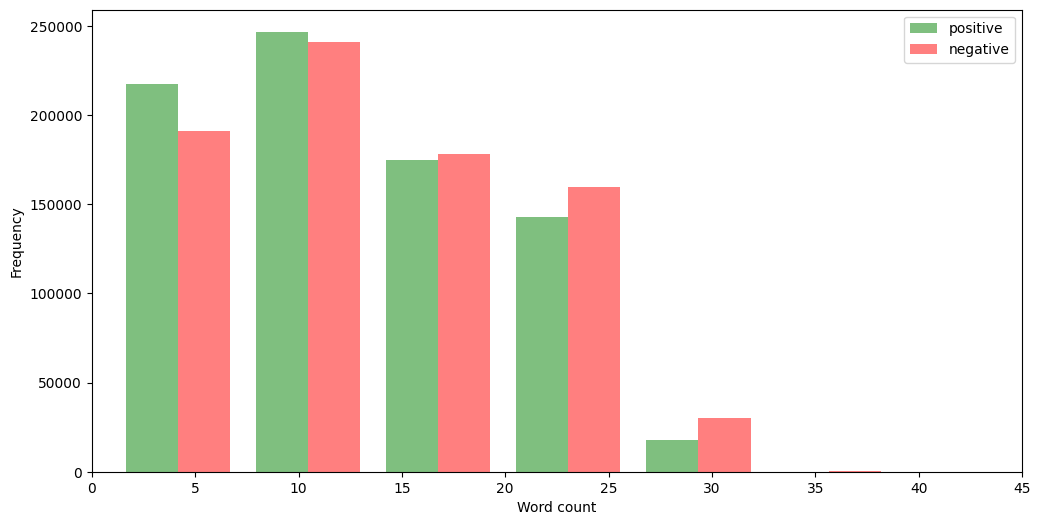

In [16]:
# plot word count distribution for both positive and negative

data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [17]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())


Counter(all_words).most_common(20)

[('the', 518734),
 ('and', 295675),
 ('you', 237766),
 ('for', 214051),
 ('have', 143295),
 ('that', 128775),
 ("i'm", 127616),
 ('but', 124676),
 ('just', 124454),
 ('with', 113488),
 ('was', 102742),
 ('not', 102160),
 ('this', 88151),
 ('get', 80943),
 ('good', 77367),
 ('are', 75994),
 ('like', 75424),
 ('all', 74076),
 ('out', 68953),
 ('your', 64854)]

# Data Preprocessing

In [ ]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(df['SentimentText']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())


Counter(all_words).most_common(20)

[('the', 5900),
 ('you', 3731),
 ('and', 3319),
 ('for', 2453),
 ('that', 1456),
 ('this', 1447),
 ('with', 1279),
 ('your', 1101),
 ('have', 1094),
 ('but', 1036),
 ("i'm", 1027),
 ('are', 1008),
 ('just', 935),
 ('like', 922),
 ('not', 894),
 ('what', 862),
 ('was', 774),
 ('all', 710),
 ('can', 684),
 ('how', 681)]

**Data Preprocessing**


In [19]:
# Removing the unnecessary columns.
data.drop(['date','query','user','word count'], axis=1, inplace=True)

In [20]:
data.drop('id', axis=1, inplace=True)

In [21]:
data.head(10)

,polarity,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [22]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [23]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [27]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'his', 'won', 'because', 'yourself', 'a', 'from', 'each', 'further', 'after', 'out', 'should', 'as', 'isn', 'wasn', 'ours', 'd', 'both', 've', 'why', 'only', 'how', "wouldn't", 'has', 'or', 'weren', 'himself', 'nor', "don't", 'don', 'before', "you'll", 'aren', "shan't", 'by', 'we', "doesn't", 'while', 'our', "you're", 'are', "shouldn't", 'wouldn', 'hers', 'is', 'through', 't', 'he', 'who', "isn't", 'your', 'about', 'with', "that'll", 'themselves', 'which', 'here', 'haven', 'doing', 'most', 'such', 'than', 'yours', 'll', "weren't", 'mightn', 'where', 'hasn', 'had', 'again', 'be', 'too', 'against', 'between', 'in', 'itself', 'my', "aren't", 'into', 'were', 'over', 'some', 'now', 's', 'y', 'does', 'having', 'to', 'been', 'for', 'whom', 'shouldn', 'her', 'same', 'myself', 'below', "she's", "mightn't", 'off', 'needn', 'but', 'up', 'more', 'ma', 'ourselves', 'i', 'hadn', 'do', 'them', 'me', 'just', 'ain', 'mustn', 'so', "won't", 'own', 'its', 'doesn', 'until', 'there', "you've", 'shan', 'ot

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

The Preprocessing steps taken are:

Lower Casing: Each text is converted to lowercase.
Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")

Removing Short Words: Words with length less than 2 are removed.
Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [29]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [41]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [42]:
data.head(10)

,polarity,text,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww thats bummer shoulda got david...
1,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0,@Kenichan I dived many times for the ball. Man...,kenichan dived many time ball managed save 50 ...
3,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving im mad cant see
5,0,@Kwesidei not the whole crew,kwesidei whole crew
6,0,Need a hug,eed hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...,loltrish hey long time see yes rain bit bit lo...
8,0,@Tatiana_K nope they didn't have it,tatianak nope didnt
9,0,@twittera que me muera ?,twittera que muera


# Analyzing the data

Word-Cloud for Negative tweets.

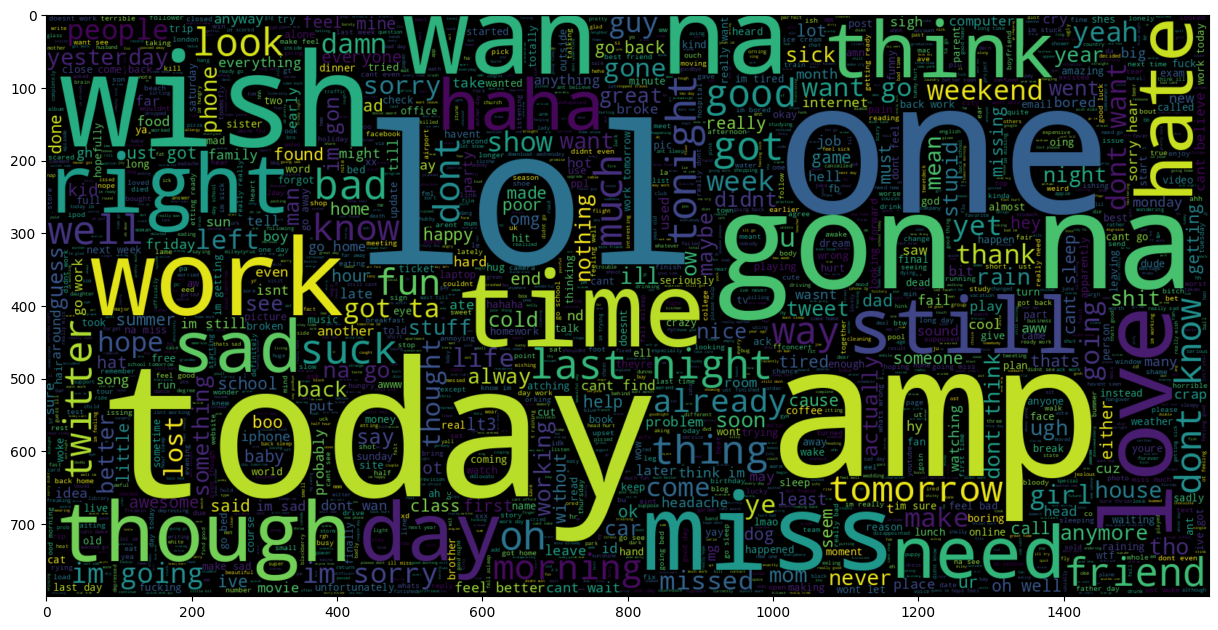

In [43]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

Word-Cloud for Positive tweets.

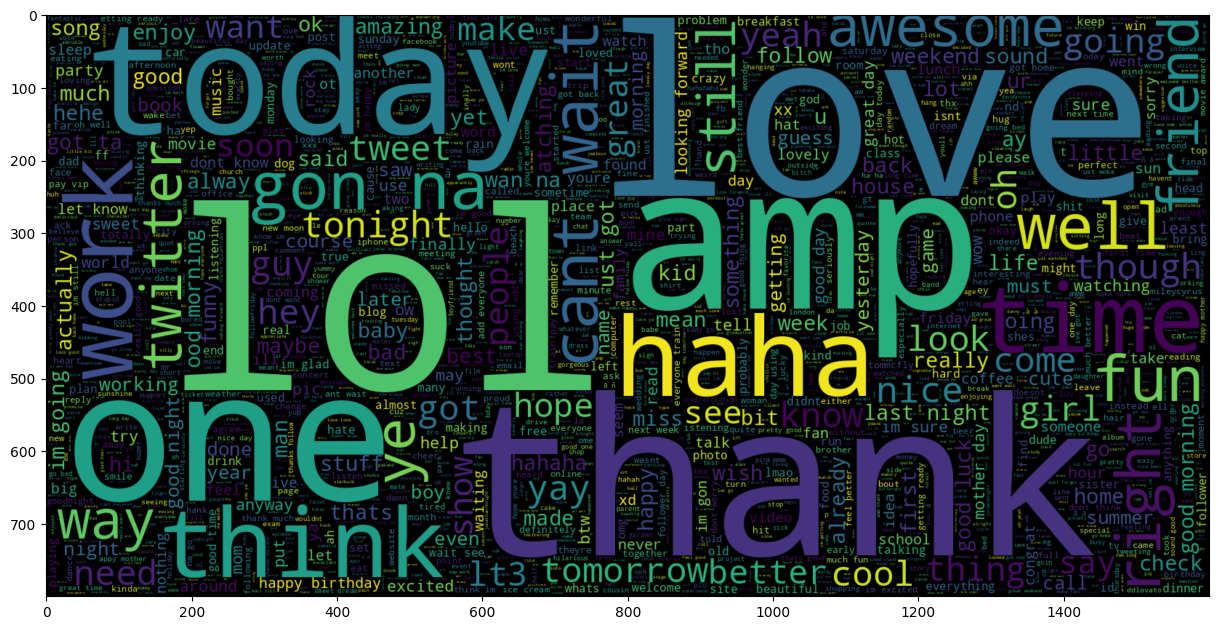

In [44]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 1].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

# Vectorization and Splitting the data

Storing input variable-processes_tweets to X and output variable-polarity to y

In [47]:
X = data['processed_tweets'].values
y = data['polarity'].values

# Convert text to word frequency vectors

TF-IDF
This is an acronym than stands for Term Frequency – Inverse Document Frequency which are the components of the resulting scores assigned to each word.

Term Frequency: This summarizes how often a given word appears within a document.
Inverse Document Frequency: This downscales words that appear a lot across documents.

In [48]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')


Vector fitted.


# Split train and test

The Preprocessed Data is divided into 2 sets of data:

Training Data: The dataset upon which the model would be trained on. Contains 80% data.
Test Data: The dataset upon which the model would be tested against. Contains 20% data.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)

In [50]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1280000, 762358)
y_train (1280000,)

X_test (320000, 762358)
y_test (320000,)


# Model Building

Model evaluating function

In [51]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)

    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Logistic Regression

Accuracy of model on training data : 82.03328125
Accuracy of model on testing data : 78.50812499999999 

              precision    recall  f1-score   support

           0       0.80      0.76      0.78    159763
           1       0.77      0.81      0.79    160237

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.78    320000
weighted avg       0.79      0.79      0.78    320000



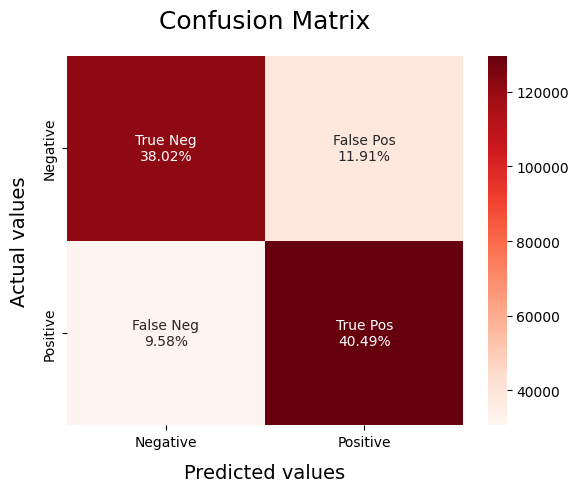

In [52]:
lg = LogisticRegression()
history=lg.fit(X_train, y_train)
model_Evaluate(lg)

Linear SVM

Accuracy of model on training data : 89.1925
Accuracy of model on testing data : 77.8465625 

              precision    recall  f1-score   support

           0       0.79      0.76      0.77    159763
           1       0.77      0.79      0.78    160237

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



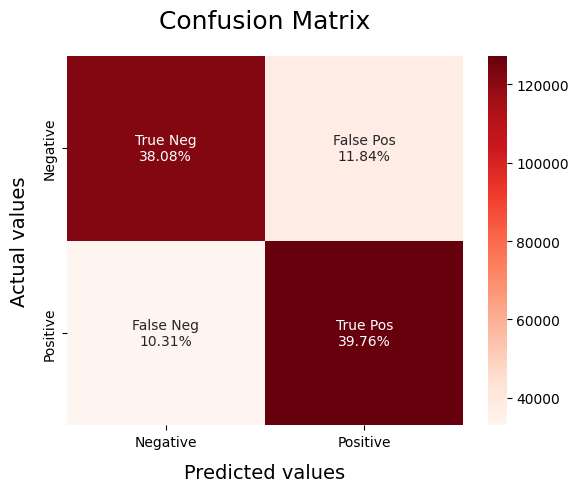

In [53]:
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

Random Forest

Accuracy of model on training data : 70.89
Accuracy of model on testing data : 69.3890625 

              precision    recall  f1-score   support

           0       0.73      0.61      0.67    159763
           1       0.67      0.77      0.72    160237

    accuracy                           0.69    320000
   macro avg       0.70      0.69      0.69    320000
weighted avg       0.70      0.69      0.69    320000



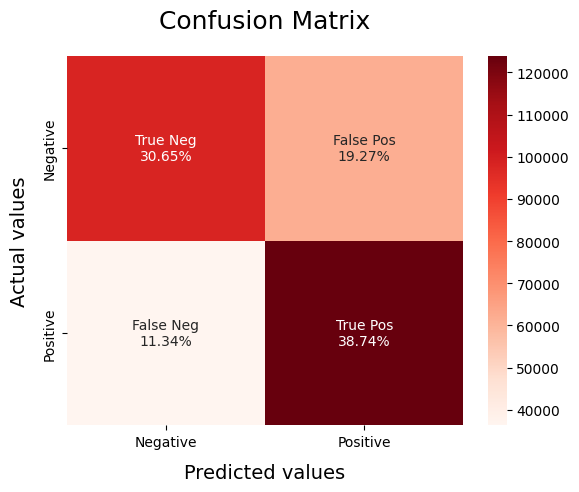

In [54]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)

Naive Bayes

Accuracy of model on training data : 83.894296875
Accuracy of model on testing data : 77.2934375 

              precision    recall  f1-score   support

           0       0.77      0.79      0.78    159763
           1       0.78      0.76      0.77    160237

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



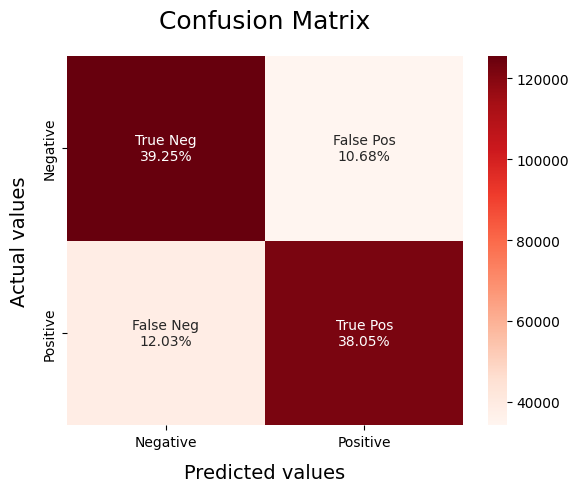

In [55]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

# Model Saving, Loading and Prediction

In [56]:
import pickle

file = open('vectoriser.pickle','wb')
pickle.dump(vector, file)
file.close()

file = open('logisticRegression.pickle','wb')
pickle.dump(lg, file)
file.close()

file = open('SVM.pickle','wb')
pickle.dump(svm, file)
file.close()

file = open('RandomForest.pickle','wb')
pickle.dump(rf, file)
file.close()

file = open('NaivesBayes.pickle','wb')
pickle.dump(nb, file)
file.close()

# Predict using saved model

In [57]:
def load_models():
    # Load the vectoriser.
    file = open('vectoriser.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('logisticRegression.pickle', 'rb')
    lg = pickle.load(file)
    file.close()
    return vectoriser, lg


In [58]:
def predict(vectoriser, model, text):
    # Predict the sentiment
    processes_text=[process_tweets(sen) for sen in text]
    textdata = vectoriser.transform(processes_text)
    sentiment = model.predict(textdata)

    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [65]:
# Specify the CSV file path
import csv
csv_file_path = 'Vikas_pandey.csv'

# Specify the column index (0-based) that you want to extract
column_index = 0 # Adjust this to the appropriate column index

# Initialize an empty list to store the column values
column_list = []

# Open the CSV file and read the specified column into the list
with open(csv_file_path, 'r', newline='', encoding='latin-1') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        if len(row) > column_index:
            column_list.append(row[column_index])

# Print the extracted column values


In [66]:
if __name__=="__main__":
    # Loading the models.
    vectoriser, lg = load_models()

    # Text to classify should be in a list.

    df = predict(vectoriser, lg, column_list)
    print(df.head())

                                                text sentiment
0                                      SentimentText  Positive
1                       Fun Time Saryu Ghat, Ayodhya  Positive
2    Take only pictures, leave only footprints.....?  Positive
3  When youre happy you enjoy the music, but whe...  Negative
4  It hurts when someone you know becomes someone...  Negative
